# Football matches binary classifier 


## Abstract 
In this project I created a binary classifier (win vs lose and draw). The ability to predic if a team will win, based on match statistics, could be very usefull tool to gain insights. Such a model could be used by a coaching staff of a team, for example develope a more targeted work on attributes that are highly correlated to winning. Another market that could benefit from this kind of a model is the betting market.

I gathered the data from rbref.com with a scraper I wrote using BeautifulSoup. Then I did EDA and some data-processing that mostly included dealing with nan values. The next step was feature selction using: p-value test, correlation test and omitting features that might indicate a win (e.g scored_goals, clean_sheet). 
For the training part I tried three different classifiers : **RandomForest**, **SGD** and **logistic regression** which gave the best results : **f-score** = 0.82 and cross-validation cv=3, gave an average of **0.82**, **0.79**, **0.78** for **accuracy**, **precision** and **recall** accordingly. 
The **prediction** using logistic regression classifier gave the the following results: 
* **f-score** : 0.79
* **accuracy** : 0.83



## Data part - Scraping, Processing and Analysis 
* **Scraping:**
      In order to gather the data for this project I wrote a web scraper using BeautifulSoup package. It scraped the data from the sporsts statistics website fbref.com. The matches I included are from the LaLiga (first spanish football   division) seasones 2017-2022. I included the teams that participated in LA-Liga for those five consecutive seasones (in other words the teams that didnt relegate).

* **Processing:**  
     - Filling nan values either with a specific value that made sense to this attribute (as can be seen in the                       project code!!!!(need to link)) or with the average of the column if the nans were under 10% of all the values in the feature.
     
     - Omitting categorical features that doesn't contribute 
     - Converting string categorical features into numerical categorical features 
          

* **Analysis:**
      By plotting the histograms of the features it was possible to see that the data was either distributed normally  or  some decaying. there were no outliers except of one attribute(gk_save_pct).   



    
       
    



## Feature selection 
After processing the data, inspecting its distributions made sense and dividing the data set into train and test set. 
I started the feature selection / elimination part. At the beginning there were 167 features. The most necessary elimination was the features that highly idicates a win (e.g - goals_scored, Assists etc.). This elimination step left 135 features. 
Running a quick test at the current situation gave these results:


| classifier        |accuracy (train_set)| f-score (train_set)   | accuracy (cv)      | f-score(cv) |
| :-------------    | :-----------------:|  :------------------: |:------------------:|:-----------:|
| Random Forest     |  0.74              |  0.58                 |   0.73             |  0.57       |
| SGD               |  0.83              |  0.8                  |   0.57             |  0.55       |
| Linear regression |  0.88              |  0.85                 |   0.78             |  0.74       |

<br>As it is seen from the table. The linear regression classifier did the best. Yet in order for it to converge I had to increase max_iter to 5000. To compute the coss-validation with cv=3 took ~ 1.5 min (this was for all solvers under l2 penalty - 'newton-cg','saga', 'sag).

<br>As to the other classifiers. RF did poorly on the f-score measurment, yet it did seem to generlize well. 
SGD did well on the train set but poorly on the cross-validation - so overfit the data. There was a need for more feature selection filters to see whether the classifiers could do better. Hence I used p-value test and correlation test between features. At the end the feature selection test consisted of three steps : 

1.   **P-Value Test** 
         The test calculates the P-value between the target feature and the other features. If the value is larger then a 
         chosen threshold (alpha), then the relationship between the target and the feature is coincidental and the feature 
         is dropped. Otherwise it indicates that there is a statistical significance between them and the feature is kept.
         
2. **Hand Picked Features**
       As mentioned before In this step I picked the features that might indicate a win (e.g scored_goals, clean_sheet). Or features that there is little control over them as they are composed of many factors e.g - x.g and npxg_per_sho (The full list could be seen in the project code. (need to linkLINK!!!)
       
3. **Correlation Test**
       This test calculates the correlation between each pair of features. If it is larger than a chosen threshold (0.9 in this case) then we know that there is little variance between them and the classifier's algorithm won't learn much new information, if at all.
       
After implementing those three steps the measurments for the classifiers were:

| classifier        |accuracy (train_set)| f-score (train_set)   | accuracy (cv)      | f-score(cv) |
| :-------------    | :-----------------:|  :------------------: |:------------------:|:-----------:|
| Random Forest     |  0.76              |  0.62                 |   0.74             |  0.59       |
| SGD               |  0.82              |  0.79                 |   0.6              |  0.66       |
| Linear regression |  0.85              |  0.82                 |   0.82             |  0.79       |

<br> After eliminating more features we can see that the performance the classifiers improved slighly and they generlized better than before. As well the Linear regression could run and converge with max_iter = 100 rather than 5000 before.
The classifier that performed the best was - Linear regressin and I picked it to predict the test set.     

Just before moving to the prediction results here are two plots of the features to get a general sense:
* Heatmap of the top 4 positive and negative correlated features:


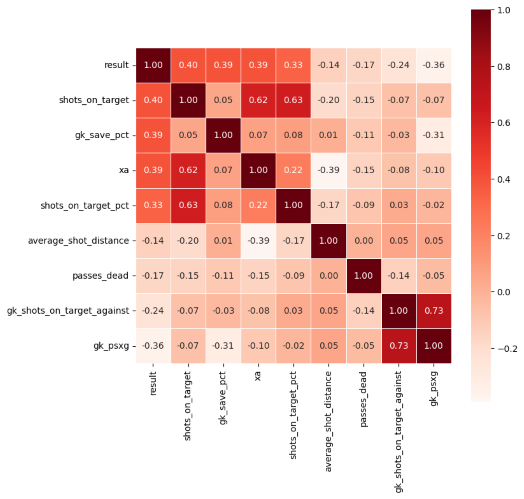






* Histograms of the top 4 positive and negative correlated features after rescaling of the data:

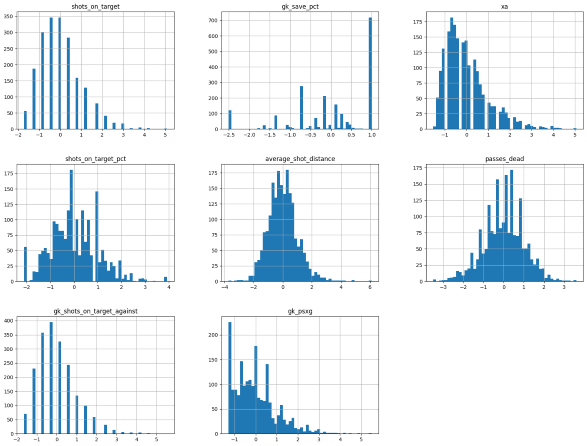

## Predictions
Finally the predictions made on the test set with the Logistic Regression classifier are : 
* **Accuracy** : 0.83
* **precision** : 0.81
* **recall** : 0.77
* **f-score** : 0.79

## Code and Resources 
* First of all the data used in this project is credited to Sports Resources at the website FBREF 
  - https://fbref.com/en/
* Pyhton version : 3.8
* Packages used : Numpy, Pandas, Matplotlib, Seaborn, Scipy, Sklearn, BeautifulSoup